In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data_dir = 'Data\Marine Species'

In [3]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_set = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_set = datagen.flow_from_directory(
    data_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='validation')

Found 2064 images belonging to 2 classes.
Found 515 images belonging to 2 classes.


In [4]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)

# Create the base model from the pre-trained MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')
base_model.trainable = False

In [5]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [6]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(train_set,
                    epochs=15,
                    validation_data=val_set,)

Epoch 1/15


C:\UPN_Kuliah\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
C:\UPN_Kuliah\Anaconda\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


33/33 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.7522 - loss: 1.3031 - val_accuracy: 0.8656 - val_loss: 0.9672
Epoch 2/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9256 - loss: 0.7733 - val_accuracy: 0.8656 - val_loss: 0.8241
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9558 - loss: 0.5577 - val_accuracy: 0.8752 - val_loss: 0.7194
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9664 - loss: 0.4228 - val_accuracy: 0.8772 - val_loss: 0.6138
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9766 - loss: 0.3381 - val_accuracy: 0.8599 - val_loss: 0.6953
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9749 - loss: 0.2781 - val_accuracy: 0.8791 - val_loss: 0.5880
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.9871 - loss: 0.2101 - val_accuracy: 0.8752 - val_loss: 0.5770
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.9821 - loss: 0.1855 - val_accuracy: 0.9060 - val_loss: 0.4609
Epo

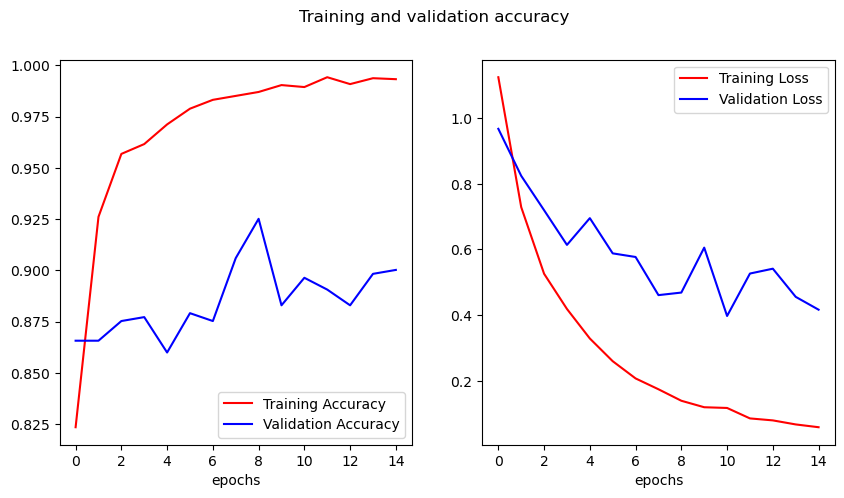

In [8]:
# Get training summary validation accuracies
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 5, 5, 64)       │       737,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,507,560 (17.19 MB)

 Trainable params: 749,858 (2.86 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

 Optimizer params: 1,499,718 (5.72 MB)

In [10]:
print (train_set.class_indices)

labels = '\n'.join(sorted(train_set.class_indices.keys()))

with open('labels Species.txt', 'w') as f:
    f.write(labels) 

{'danger': 0, 'safe': 1}


In [11]:
#save the model
saved_model_path = "safety.h5"

model.save(saved_model_path)